![Colegio Bourbaki](./Images/Bourbaki.png)

## Grandes Modelos de Lenguaje

En la última década, el campo del procesamiento del lenguaje natural (NLP, por sus siglas en inglés) ha experimentado avances significativos gracias al desarrollo de los grandes modelos de lenguaje. Estos modelos, basados en arquitecturas de redes neuronales profundas como los transformers, han revolucionado la manera en que las máquinas entienden y generan texto humano. El éxito de estos modelos se atribuye principalmente a su capacidad para aprender patrones complejos del lenguaje a partir de enormes volúmenes de datos textuales.

Los grandes modelos de lenguaje, como GPT (Generative Pre-trained Transformer) de OpenAI, BERT (Bidirectional Encoder Representations from Transformers) de Google, y otros modelos similares desarrollados por empresas como Facebook y Microsoft, son ejemplos destacados de esta tecnología. Estos modelos son preentrenados en un rango extenso de datos de Internet antes de ser afinados para tareas específicas de NLP, como la traducción automática, el resumen de textos, la generación de contenido, entre otros.

### Generación de texto

La generación de texto es una de las aplicaciones más impresionantes de los grandes modelos de lenguaje. Utilizando lo que han aprendido durante el entrenamiento, estos modelos pueden producir textos que van desde respuestas a preguntas hasta artículos completos de manera coherente y contextualmente adecuada. Esto se logra a través de un proceso donde el modelo predice la siguiente palabra en una secuencia dada una serie de palabras anteriores, iterando este proceso para generar secuencias de texto de longitud variable.

No obstante, el despliegue de grandes modelos de lenguaje no está exento de desafíos. La generación de lenguaje automático plantea preguntas éticas importantes, especialmente en cuanto a la veracidad y el sesgo del contenido generado. Además, el entrenamiento y la operación de estos modelos requieren una cantidad considerable de recursos computacionales, lo que plantea preocupaciones sobre la sostenibilidad y la accesibilidad de estas tecnologías.

A medida que avanzamos, es crucial que la comunidad de investigación en IA aborde estos desafíos de manera ética y responsable, asegurando que los beneficios de los grandes modelos de lenguaje sean accesibles para todos y que sus aplicaciones se desarrollen de manera que beneficie a la sociedad en su conjunto.

### Hugging Face

Hugging Face es una compañía líder en el campo de la inteligencia artificial que se ha especializado en el desarrollo y la aplicación de tecnologías de procesamiento del lenguaje natural (NLP, por sus siglas en inglés). Fundada en 2016, inicialmente comenzó como una aplicación social para compartir emojis y GIFs, pero rápidamente se transformó en un pionero de la IA al reconocer el potencial de los modelos de lenguaje.

La contribución más significativa de Hugging Face al mundo de la IA ha sido su plataforma y biblioteca de modelos de transformers, que facilita a los desarrolladores y científicos de datos el acceso a modelos de lenguaje preentrenados y las herramientas necesarias para entrenarlos y desplegarlos. La biblioteca Transformers, su producto más conocido, incluye una amplia variedad de modelos de última generación, como BERT, GPT, T5, y muchos otros, que se pueden utilizar para una amplia gama de tareas de NLP.

El enfoque de Hugging Face hacia la democratización de la IA también se refleja en su comunidad colaborativa y de código abierto. La compañía promueve una cultura de colaboración y transparencia, permitiendo que investigadores, desarrolladores y empresas compartan modelos y técnicas, fomentando así la innovación y el progreso en el campo. Además, Hugging Face también se esfuerza por abordar los aspectos éticos de la IA, trabajando en la mejora del entendimiento y la reducción de sesgos en los modelos de lenguaje.

Con una creciente comunidad de usuarios y contribuyentes, Hugging Face sigue a la vanguardia de la investigación en IA, ofreciendo soluciones que no solo avanzan en el estado del arte, sino que también se esfuerzan por ser éticamente responsables y accesibles para todos.

### Librerias

In [1]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Hugging Face
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from transformers.trainer_callback import EarlyStoppingCallback

# Utils
import math
import os
import torch

### Configuraciones

In [2]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:2'
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

### Carga de Datos

Los datos puede verse en: https://huggingface.co/datasets/andersonbcdefg/biology

Veremos cómo cargar y preprocesar fácilmente el conjunto de datos, y cómo utilizar la API Trainer para entrenar un modelo con él.

In [3]:
dataset = load_dataset("andersonbcdefg/biology")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 20000
    })
})

In [5]:
dataset["train"]["message_2"][1]

"Changes in gut microbiota composition can significantly affect the immune system of animals and their susceptibility to infectious diseases. The gut microbiota, which consists of trillions of microorganisms, including bacteria, fungi, and viruses, plays a crucial role in maintaining the overall health of the host organism. These microorganisms contribute to various physiological processes, such as digestion, metabolism, and immune system regulation.\n\nThe immune system and gut microbiota have a bidirectional relationship, where the immune system shapes the composition of the gut microbiota, and the gut microbiota influences the development and function of the immune system. Here are some ways in which changes in gut microbiota composition can affect the immune system and susceptibility to infectious diseases:\n\n1. Barrier function: A healthy gut microbiota helps maintain the integrity of the gut barrier, which prevents the entry of pathogens and harmful substances into the bloodstre

In [6]:
dataset["train"][0]

{'role_1': 'Biologist_RoleType.ASSISTANT',
 'topic;': 'Genetics',
 'sub_topic': 'Genetic basis of metabolic disorders',
 'message_1': 'How does genetic variation contribute to the development of metabolic disorders such as diabetes and obesity?',
 'message_2': "Genetic variation plays a significant role in the development of metabolic disorders such as diabetes and obesity. These variations can occur in the form of single nucleotide polymorphisms (SNPs), insertions, deletions, or other structural changes in the DNA sequence. These genetic differences can influence an individual's susceptibility to developing metabolic disorders through several mechanisms:\n\n1. Gene function: Genetic variations can directly affect the function of genes involved in metabolism, leading to altered protein function or expression. For example, mutations in the gene encoding for the hormone leptin or its receptor can lead to obesity due to impaired regulation of appetite and energy expenditure.\n\n2. Gene re

Vamos a tomar un subconjuto del dataset completo:

In [7]:
# Split the training set to obtain a random sample of 10,000 rows
# sampled_dataset = dataset["train"].train_test_split(test_size=10000, seed=42)

In [8]:
# dataset = sampled_dataset["train"].train_test_split(test_size=0.2)

In [9]:
dataset = dataset["train"].train_test_split(test_size=0.2)

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 4000
    })
})

### Análisis Exploratiorio

In [11]:
# Convert the train and test datasets to pandas DataFrames
train_df = dataset["train"].to_pandas()

In [12]:
train_df.head()

,role_1,topic;,sub_topic,message_1,message_2
0,Biologist_RoleType.ASSISTANT,Genetics,Genetic basis of neurological disorders,How do mutations in specific genes such as hun...,"Mutations in specific genes, such as huntingti..."
1,Biologist_RoleType.ASSISTANT,Neurobiology,The effects of nutrition on brain function,How does a high-fat diet affect the cognitive ...,A high-fat diet can have significant effects o...
2,Biologist_RoleType.ASSISTANT,Taxonomy,Identification of the correct paratype for a g...,Given a new species of butterfly collected in ...,To determine the correct paratype specimen of ...
3,Biologist_RoleType.ASSISTANT,Biotechnology,Creating new methods for producing recombinant...,How can biotechnology be utilized to create mo...,Biotechnology can be utilized to create more e...
4,Biologist_RoleType.ASSISTANT,Parasitology,The impact of parasitic infections on wildlife...,How does the distribution and prevalence of pa...,The distribution and prevalence of parasitic i...


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   role_1     16000 non-null  object
 1   topic;     16000 non-null  object
 2   sub_topic  16000 non-null  object
 3   message_1  16000 non-null  object
 4   message_2  16000 non-null  object
dtypes: object(5)
memory usage: 625.1+ KB


In [14]:
# Frequency of categories in 'topic;'
print(train_df["topic;"].value_counts())

topic;
Botany            664
Microbiology      658
Biotechnology     655
Marine biology    654
Biomechanics      654
Parasitology      652
Entomology        648
Anatomy           646
Cell biology      642
Genetics          641
Biostatistics     641
Biochemistry      639
Paleontology      638
Endocrinology     638
Taxonomy          638
Evolution         636
Virology          636
Physiology        635
Biogeography      634
Zoology           633
Immunology        631
Biophysics        626
Ecology           624
Neurobiology      619
Mycology          618
Name: count, dtype: int64


In [15]:
# Frequency of categories in 'sub_topic'
train_df["sub_topic"].value_counts()

sub_topic
The evolution of antibiotic resistance in bacteria                  54
Explain the structure and function of the human skeletal system.    32
Cluster analysis in biological data                                 31
The impact of habitat fragmentation on insect populations           31
The role of animal behavior in conservation efforts                 31
                                                                    ..
Human population growth and its impact on natural resources         20
Urbanization and its impact on wildlife habitats                    19
The mechanism of action of immunomodulatory therapies.              19
The evolution of primates and their adaptations                     19
The role of animal behavior in predator-prey interactions           17
Name: count, Length: 624, dtype: int64

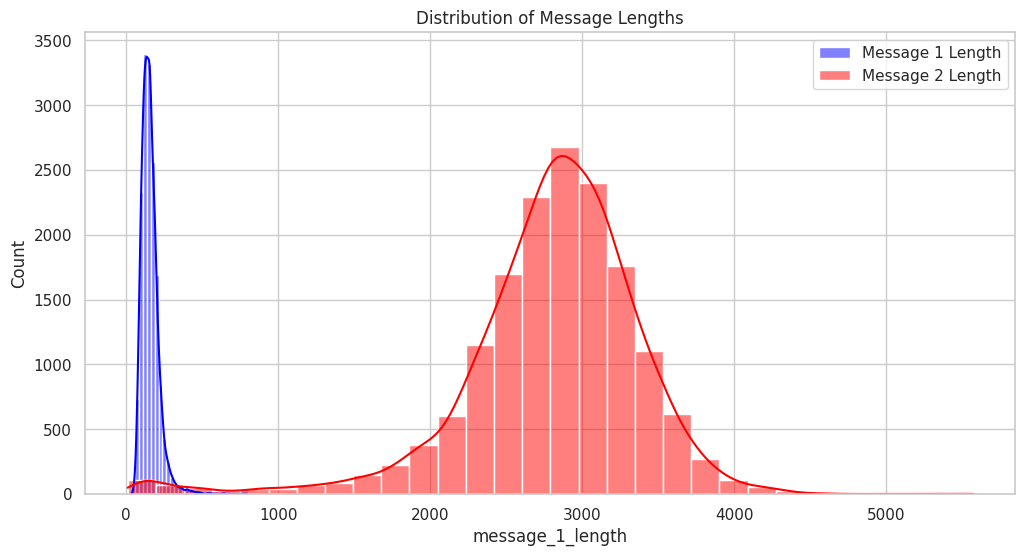

In [16]:
# Setting the aesthetic style for the plots
sns.set_theme(style="whitegrid")

# Visualizing message lengths
train_df["message_1_length"] = train_df["message_1"].apply(len)
train_df["message_2_length"] = train_df["message_2"].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(
    train_df["message_1_length"],
    bins=30,
    label="Message 1 Length",
    kde=True,
    color="blue",
)
sns.histplot(
    train_df["message_2_length"],
    bins=30,
    label="Message 2 Length",
    kde=True,
    color="red",
)
plt.legend()
plt.title("Distribution of Message Lengths")
plt.show()

### Causal Modeling

Para el modelado causal del lenguaje (CLM) vamos a tomar todos los textos de nuestro conjunto de datos y a concatenarlos después de haberlos tokenizado. A continuación, los dividiremos en ejemplos de una determinada longitud secuencial. De este modo, el modelo recibirá trozos de texto contiguos que pueden tener este aspecto:

* parte del texto 1

o

* final del texto 1 [BOS_TOKEN] comienzo del texto 2

dependiendo de si abarcan varios de los textos originales del conjunto de datos o no. Las etiquetas serán las mismas que las entradas, desplazadas.
Utilizaremos el modelo distilgpt2 para este ejemplo. En su lugar, puede elegir cualquiera de los enumerados aquí: https://huggingface.co/models?other=causal-lm

### Modelo GPT2 Distilled

In [17]:
model_checkpoint = "distilgpt2"

Para tokenizar todos nuestros textos con el mismo vocabulario que se utilizó al entrenar el modelo, tenemos que descargar un tokenizador preentrenado. Todo esto lo hace la clase *AutoTokenizer*:

In [18]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

Crearemos una funcion para tokenizar los textos:

In [19]:
def tokenize_function(example):
    # Assuming example['message_2'] are the fields you want to tokenize
    tokenized_output = tokenizer(
        example["message_2"], padding="max_length", truncation=True, return_tensors="pt"
    )
    return {
        "input_ids": tokenized_output["input_ids"].tolist(),
        "attention_mask": tokenized_output["attention_mask"].tolist(),
    }

Ahora podemos llamar al tokenizador en todos nuestros textos. Esto es muy sencillo, utilizando el método map de la librería Datasets. Hacemos uso de la función anterior y luego lo aplicamos a todas las divisiones de nuestro objeto datasets. No necesitaremos la columna de texto después, así que la descartamos.

In [20]:
tokenized_datasets = dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=["role_1", "topic;", "sub_topic", "message_1", "message_2"],
)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [21]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 4000
    })
})

Si ahora miramos un elemento de nuestros conjuntos de datos, veremos que el texto ha sido sustituido por los input_ids que necesitará el modelo:

In [22]:
tokenized_datasets["train"][1]

{'input_ids': [32,
  1029,
  12,
  17359,
  5496,
  460,
  423,
  2383,
  3048,
  319,
  262,
  10870,
  2854,
  290,
  4069,
  286,
  10693,
  4981,
  13,
  12168,
  3640,
  423,
  3402,
  326,
  10693,
  11672,
  257,
  1029,
  12,
  17359,
  5496,
  15866,
  22753,
  4673,
  11,
  4088,
  11,
  290,
  10870,
  13688,
  11,
  355,
  880,
  355,
  3220,
  9751,
  12,
  2339,
  14301,
  13,
  383,
  10238,
  7669,
  8482,
  2770,
  11701,
  2157,
  777,
  3048,
  389,
  3716,
  290,
  43543,
  23253,
  276,
  11,
  7411,
  2972,
  3632,
  7652,
  290,
  22049,
  22963,
  13,
  2773,
  286,
  262,
  1994,
  11701,
  2291,
  25,
  198,
  198,
  16,
  13,
  13782,
  29639,
  341,
  25,
  3334,
  12,
  17359,
  18977,
  460,
  1085,
  284,
  281,
  2620,
  287,
  386,
  12,
  32272,
  42440,
  1127,
  287,
  262,
  3632,
  11,
  884,
  355,
  987,
  293,
  2724,
  259,
  12,
  16,
  26638,
  357,
  4146,
  12,
  16,
  26638,
  828,
  987,
  293,
  2724,
  259,
  12,
  21,
  357,
  4146,
  

Ahora viene la parte más difícil: tenemos que concatenar todos nuestros textos y dividir el resultado en pequeños trozos de un determinado tamaño de bloque. Para ello, utilizaremos de nuevo el método map, con la opción batched=True. Esta opción nos permite cambiar el número de ejemplos en los conjuntos de datos devolviendo un número de ejemplos diferente al que obtuvimos. De esta forma, podemos crear nuestras nuevas muestras a partir de un lote de ejemplos.

Primero, tomamos la longitud máxima con la que nuestro modelo fue preentrenado. Esto podría ser demasiado grande para caber en la RAM de tu GPU, así que aquí tomamos un poco menos, sólo 128.

In [23]:
# tokenizer.model_max_length

In [24]:
block_size = 128

A continuación, escribimos la función de preprocesamiento que agrupará nuestros textos:

In [25]:
def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

Primero notemos que duplicamos las entradas para nuestras etiquetas. Esto se debe a que el modelo de la librería Transformers aplica el desplazamiento a la derecha, por lo que no necesitamos hacerlo manualmente.

Tengamos en cuenta también que, por defecto, el método map enviará un lote de 1.000 ejemplos para que sean tratados por la función de preprocesado. Así que aquí, dejaremos el resto para que los textos tokenizados concatenados sean un múltiplo del tamaño del bloque cada 1.000 ejemplos. Podemos ajustar esto pasando un tamaño de lote mayor (que también se procesará más lentamente). También podemos acelerar el preprocesamiento utilizando el multiprocesamiento:

In [26]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1024,
)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Podemos comprobar que nuestros conjuntos de datos han cambiado: ahora las muestras contienen trozos de tokens contiguos de la variable *block_size*, que potencialmente abarcan varios de nuestros textos originales.

In [27]:
tokenizer.decode(lm_datasets["train"][1]["input_ids"])

' of the polyQ tract is inversely proportional to the age of onset of the disease; longer repeats result in earlier onset and more severe symptoms.\n\nThe mutant huntingtin protein (mHTT) has several deleterious effects on cellular functions, including:\n\na. Protein aggregation: The expanded polyQ tract in mHTT makes the protein more prone to misfolding and aggregation, leading to the formation of intracellular inclusion bodies. These aggregates can disrupt cellular processes and contribute to neuronal dysfunction and death.\n\nb. Impaired protein clearance: mHTT can interfere with the ubiquitin-'

### Training

Ahora que los datos han sido limpiados, estamos listos para instanciar nuestra instancia Trainer. Primero creamos el modelo utilizando la misma configuración que nuestro punto de control, pero inicializado con pesos aleatorios:

In [28]:
model = AutoModelForCausalLM.from_pretrained(model_checkpoint)

In [29]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [30]:
LR = 0.001

In [31]:
model_name = model_checkpoint.split("/")[-1]

Vamos a necesitar pasar también atributos al modelo:

In [32]:
training_args = TrainingArguments(
    output_dir=f"./Data/Model/{model_name}-finetuned-microbiology",
    num_train_epochs=3,
    evaluation_strategy="epoch",
    # {Another Strategy
    # evaluation_strategy="steps",
    # eval_steps=500,  # Number of update steps between two evaluations},
    learning_rate=LR,
    weight_decay=LR * 0.1,
    fp16=True,
    push_to_hub=False,  # este atributo lo pueden utilizar para mandar el modelo a Hugging Face
)

Instanciamos la clase Trainer:

In [33]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["test"],
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

Antes de entrenar, tomemos conciencia y comparemos con el caso de resúmenes de texto. Con cuántas líneas de código logramos llegar al entrenamiento?

In [34]:
trainer.train()

  0%|          | 0/48000 [00:00<?, ?it/s]

{'loss': 1.7825, 'grad_norm': 0.5937178730964661, 'learning_rate': 0.0009896875000000001, 'epoch': 0.03}
{'loss': 1.561, 'grad_norm': 1.0110406875610352, 'learning_rate': 0.0009792708333333333, 'epoch': 0.06}
{'loss': 1.4217, 'grad_norm': 0.7497739791870117, 'learning_rate': 0.0009688541666666667, 'epoch': 0.09}
{'loss': 1.3588, 'grad_norm': 0.6567557454109192, 'learning_rate': 0.0009584375000000001, 'epoch': 0.12}
{'loss': 1.3136, 'grad_norm': 0.5361918210983276, 'learning_rate': 0.0009480208333333334, 'epoch': 0.16}
{'loss': 1.2962, 'grad_norm': 0.544757604598999, 'learning_rate': 0.0009376041666666667, 'epoch': 0.19}
{'loss': 1.2709, 'grad_norm': 0.7811211943626404, 'learning_rate': 0.0009271875000000001, 'epoch': 0.22}
{'loss': 1.2102, 'grad_norm': 0.9319621324539185, 'learning_rate': 0.0009167708333333333, 'epoch': 0.25}
{'loss': 1.1899, 'grad_norm': 0.58756422996521, 'learning_rate': 0.0009063541666666667, 'epoch': 0.28}
{'loss': 1.1942, 'grad_norm': 0.6978874802589417, 'learning

  0%|          | 0/4000 [00:00<?, ?it/s]

{'eval_loss': 0.9488759636878967, 'eval_runtime': 1806.9262, 'eval_samples_per_second': 17.71, 'eval_steps_per_second': 2.214, 'epoch': 1.0}
{'loss': 0.9029, 'grad_norm': 0.5616220831871033, 'learning_rate': 0.0006563541666666667, 'epoch': 1.03}
{'loss': 0.8733, 'grad_norm': 0.5608026385307312, 'learning_rate': 0.0006459375, 'epoch': 1.06}
{'loss': 0.8835, 'grad_norm': 0.768596887588501, 'learning_rate': 0.0006355208333333333, 'epoch': 1.09}
{'loss': 0.883, 'grad_norm': 0.5612077116966248, 'learning_rate': 0.0006251041666666667, 'epoch': 1.12}
{'loss': 0.8797, 'grad_norm': 0.6090928316116333, 'learning_rate': 0.0006146875000000001, 'epoch': 1.16}
{'loss': 0.8549, 'grad_norm': 0.5969725251197815, 'learning_rate': 0.0006042916666666667, 'epoch': 1.19}
{'loss': 0.8535, 'grad_norm': 0.6992983818054199, 'learning_rate': 0.000593875, 'epoch': 1.22}
{'loss': 0.8582, 'grad_norm': 0.6456301808357239, 'learning_rate': 0.0005834583333333333, 'epoch': 1.25}
{'loss': 0.8602, 'grad_norm': 0.59162473

  0%|          | 0/4000 [00:00<?, ?it/s]

{'eval_loss': 0.8206561803817749, 'eval_runtime': 1955.7212, 'eval_samples_per_second': 16.362, 'eval_steps_per_second': 2.045, 'epoch': 2.0}
{'loss': 0.6871, 'grad_norm': 0.7045567631721497, 'learning_rate': 0.0003231458333333334, 'epoch': 2.03}
{'loss': 0.6913, 'grad_norm': 0.6937209963798523, 'learning_rate': 0.00031272916666666667, 'epoch': 2.06}
{'loss': 0.6711, 'grad_norm': 0.6332813501358032, 'learning_rate': 0.0003023125, 'epoch': 2.09}
{'loss': 0.686, 'grad_norm': 0.7110790610313416, 'learning_rate': 0.00029189583333333335, 'epoch': 2.12}
{'loss': 0.6895, 'grad_norm': 0.6656008958816528, 'learning_rate': 0.0002814791666666667, 'epoch': 2.16}
{'loss': 0.6769, 'grad_norm': 0.6053844690322876, 'learning_rate': 0.0002710625, 'epoch': 2.19}
{'loss': 0.663, 'grad_norm': 0.6288774609565735, 'learning_rate': 0.00026066666666666664, 'epoch': 2.22}
{'loss': 0.671, 'grad_norm': 0.528351902961731, 'learning_rate': 0.00025025, 'epoch': 2.25}
{'loss': 0.6787, 'grad_norm': 0.5859013199806213

  0%|          | 0/4000 [00:00<?, ?it/s]

{'eval_loss': 0.7657039761543274, 'eval_runtime': 2002.4297, 'eval_samples_per_second': 15.981, 'eval_steps_per_second': 1.998, 'epoch': 3.0}
{'train_runtime': 75187.7743, 'train_samples_per_second': 5.107, 'train_steps_per_second': 0.638, 'train_loss': 0.8848161754608155, 'epoch': 3.0}


TrainOutput(global_step=48000, training_loss=0.8848161754608155, metrics={'train_runtime': 75187.7743, 'train_samples_per_second': 5.107, 'train_steps_per_second': 0.638, 'train_loss': 0.8848161754608155, 'epoch': 3.0})

Una vez completado el entrenamiento, podemos evaluar nuestro modelo y obtener su perplejidad en el conjunto de validación de la siguiente manera:

In [35]:
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

  0%|          | 0/4000 [00:00<?, ?it/s]

Perplexity: 2.15


Podemos guardar el modelo si así lo deseamos:

In [36]:
save_directory = "./Data/Model/GPT2"

In [37]:
model.save_pretrained(save_directory)

In [38]:
tokenizer.save_pretrained(save_directory)

('./Data/Model/GPT2/tokenizer_config.json',
 './Data/Model/GPT2/special_tokens_map.json',
 './Data/Model/GPT2/vocab.json',
 './Data/Model/GPT2/merges.txt',
 './Data/Model/GPT2/added_tokens.json',
 './Data/Model/GPT2/tokenizer.json')

### Testing

Vamos a generar una función que nos permite hacer inferencias a partir de 'prompts':

In [39]:
def generate_text(prompt, model_path):
    # Load tokenizer and model from the specified model directory
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path)

    # Encode the prompt text with attention mask
    encoding = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)

    # Generate text using the model
    outputs = model.generate(
        input_ids=encoding["input_ids"],
        attention_mask=encoding["attention_mask"],
        max_length=block_size,
        pad_token_id=tokenizer.eos_token_id,  # Set pad_token_id to eos_token_id
        num_return_sequences=1,
    )

    # Decode and print the output text
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(decoded_output)

In [40]:
model_directory = "./Data/Model/GPT2"

##### Prompting

Vamos a comenzar a probar el modelo:

In [41]:
prompt_text = "Explain the role of bacteria in the nitrogen cycle."
generate_text(prompt_text, model_directory)

Explain the role of bacteria in the nitrogen cycle. This process involves the conversion of nitrogen gas (N2) into ammonia (NH3), which is then used by plants to build their calcium carbonate (CaCO3).

The nitrogen cycle consists of several stages:

1. Nitrogen fixation: Nitrogen-fixing bacteria, such as Rhizobium and Azotobacter, convert atmospheric nitrogen (N2) into ammonia (NH3), which is then used by plants as a source of nitrogen.

2. Nitrification: Nitrifying bacteria, such as Nitrosomonas and Nit


In [42]:
prompt_text = (
    "Describe the process of gram staining and its significance in microbiology."
)
generate_text(prompt_text, model_directory)

Describe the process of gram staining and its significance in microbiology. This involves the following steps:

1. Staining and preparation: The first step is to identify the microbial taxa present in the sample. This can be done by removing the contaminants, such as heavy metals, organic contaminants, and other contaminants.

2. Staining: The samples are staining techniques that can be performed on a large scale to ensure that the microorganisms are not overrepresented or in a smaller scale. This can be done using various techniques, such as drying, freezing, or preserving.

3. Staining: The


In [43]:
prompt_text = "Discuss the impact of antibiotics on human gut microbiota."
generate_text(prompt_text, model_directory)

Discuss the impact of antibiotics on human gut microbiota.

1. Increased abundance of beneficial bacteria: The overuse and misuse of antibiotics in humans and animals contribute to the development of antibiotic-resistant bacteria. When antibiotics are used excessively or inappropriately, these bacteria are killed, while the resistant ones survive and multiply. This creates a selective pressure that favors the survival and proliferation of resistant bacteria.

2. Overuse and misuse of antibiotics: The overuse and misuse of antibiotics in human medicine and agriculture contribute to the development of antibiotic resistance. This occurs through several mechanisms:

a. Inappropriate use of antibiotics: Antibiotics are


In [44]:
prompt_text = "Outline the methods used to culture viruses in the laboratory."
generate_text(prompt_text, model_directory)

Outline the methods used to culture viruses in the laboratory. These methods involve the isolation, isolation, and purification of the viral vector, which can be used to deliver the therapeutic gene to the target cells. Commonly used viral vectors include adeno-associated viruses (AAVs), lentiviruses, and retroviruses.

Adeno-associated viruses (AAVs) are commonly used in the treatment of viral infections due to their high transduction efficiency and ability to infect a wide range of host cells. They can be engineered to target specific cell types or tissues, allowing them to target specific cell types or tissues in a


In [45]:
prompt_text = "Compare and contrast aerobic and anaerobic bacteria."
generate_text(prompt_text, model_directory)

Compare and contrast aerobic and anaerobic bacteria.

2. Nitrogen fixation: Some bacteria, such as Rhizobium and Azotobacter, convert atmospheric nitrogen (N2) into ammonia (NH3), which can be used by plants. This process is called nitrification. Nitrifying bacteria convert ammonia into nitrite (NO2-) and then into nitrate (NO3-), which is released into the atmosphere. This process is called nitrification.

3. Denitrification: Denitrifying bacteria, such as Pseudomonas and Thiobacillus, convert nitrate (


Ejercicio: **Tratar de mejorar el modelo**

Veamos que sucede si introducimos un 'prompt' que no tenga relación alguna con el texto:

In [46]:
prompt_text = "Tell me the history of Manchester City F.C."
generate_text(prompt_text, model_directory)

Tell me the history of Manchester City F.C.

4. Identify the syntype: The syntype is a specimen that serves as the basis for the description and naming of a new species. It is a specimen that serves as the basis for the description and naming of a new species. The syntype should be a specimen that is representative of the species' variability and should be well-preserved.

5. Designate a lectotype: The lectotype is a single specimen chosen from the original syntypes to serve as the single type specimen. It should be in good condition, with all essential morphological features


### Preguntas

**Preguntas Básicas**

1) ¿Qué es Hugging Face y cuál es su contribución principal al campo del procesamiento del lenguaje natural?

2) ¿Qué es un "transformer" en el contexto de aprendizaje automático?

3) Menciona al menos tres aplicaciones prácticas de los modelos transformer.

**Preguntas Intermedias**

4) ¿Cómo funciona la atención auto-dirigida en los modelos de transformers?

5) Explica la diferencia entre los modelos AutoModel y AutoTokenizer en la biblioteca Transformers de Hugging Face.

6) ¿Cuáles son las ventajas de utilizar la biblioteca Transformers para el desarrollo de modelos de NLP?

**Preguntas Avanzadas**

7) Describe el proceso de fine-tuning de un modelo transformer preentrenado para una tarea específica de NLP.
    
8) ¿Qué consideraciones se deben tener en cuenta al desplegar modelos transformers en producción?

9) Discute el impacto ético del uso de modelos de lenguaje grande como GPT-3 en la sociedad.

**Pregunta de Aplicación**

10) Diseña un experimento utilizando un modelo transformer para identificar el sentimiento de los tweets. Incluye qué modelo usarías, cómo entrenarías el modelo, y cómo evaluarías su rendimiento.
      

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)